<a href="https://colab.research.google.com/github/saadkiet/CNN-Credit-Card-Fraud-Detection/blob/master/CNN_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1 : Stepup and Installation

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 450kB 56.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=dcebe19655bace941bf2d9e44afc166ad456a35b623878bad0afef23fded7a08
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#Step 2: Importing the dataset from kaggle to google colab

In [0]:
# install kaggle API
! pip install kaggle

In [0]:
#!pip uninstall -y kaggle
#!pip install --upgrade pip
#!pip install kaggle==1.5.6
#!kaggle -v

In [0]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [0]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [0]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
# list of datasets
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
paultimothymooney/covid19-containment-and-mitigation-measures  COVID-19 containment and mitigation measures         91KB  2020-03-30 14:01:44            925         62  1.0              
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  729MB  2020-03-27 23:46:53          37369       4479  0.88235295       
skylord/coronawhy                                              CoronaWhy                                             2GB  2020-03-30 18:07:00            148         25  0.9705882        
unanimad/dataisbeautiful                                       Re

In [0]:
# import the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

 68% 45.0M/66.0M [00:00<00:00, 68.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 133MB/s] 


In [0]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [0]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Step 3: Data Preprocessing

In [0]:
dataset_1.shape

(284807, 31)

In [0]:
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [0]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
fraud=dataset_1[dataset_1['Class']==1]

In [0]:
non_fraud=dataset_1[dataset_1['Class']==0]

In [0]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

To balance a data set, there should be equal no of transactions in each class

In [0]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [0]:
non_fraud_t.shape

(492, 31)

Now we have two balanced dataset. As a result, we merge both the datasets to make them one dataset

In [0]:
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [0]:
print(dataset)

         Time        V1        V2        V3  ...       V27       V28  Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1
..        ...       ...       ...       ...  ...       ...       ...     ...    ...
979   46797.0 -1.776002  1.606326  0.982439  ...  0.128433 -0.195429    2.39      0
980  124826.0  2.052834 -0.085904 -1.235378  ... -0.072661 -0.074070    1.99      0
981   19616.0  1.317326  0.523514  0.122473  ... -0.043620  0.018347    2.67      0
982   39056.0  1.047709  0.144060  1.341299  ...  0.038441  0.028065   15.18      0
983   68720.0  1.251536  0.163992 -0.208025  ... -0.017347  0.003654    1.98

In [0]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
x = dataset.drop(labels=['Class'], axis=1)
y=dataset['Class']

In [0]:
x.shape, y.shape

((984, 30), (984,))

In [0]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [0]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [0]:
from sklearn.preprocessing import MinMaxScaler
m= MinMaxScaler()
x_train_1 = sc.fit_transform(x_train)
x_test_1 = sc.transform(x_test)

In [0]:
x_train_1

array([[ 0.10032026,  0.21414114, -0.49651645, ..., -0.16570924,
        -0.53710491,  0.05152901],
       [-0.79486629,  0.49320948, -0.0896919 , ...,  0.4869065 ,
         0.62647572, -0.42120552],
       [-0.83207658,  0.1817201 ,  0.10126225, ...,  0.32334356,
         0.46915455, -0.4202996 ],
       ...,
       [-0.6468851 ,  0.19370243, -0.07049178, ..., -0.48251554,
        -0.38957384, -0.22371693],
       [-0.46658088,  0.38881998, -0.41315052, ..., -0.0661487 ,
         0.18314072, -0.24666667],
       [-0.26626616,  0.35658746, -0.1820312 , ...,  0.1747463 ,
         0.13056245, -0.40712615]])

In [0]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
x_train

array([[ 0.10032026,  0.21414114, -0.49651645, ..., -0.16570924,
        -0.53710491,  0.05152901],
       [-0.79486629,  0.49320948, -0.0896919 , ...,  0.4869065 ,
         0.62647572, -0.42120552],
       [-0.83207658,  0.1817201 ,  0.10126225, ...,  0.32334356,
         0.46915455, -0.4202996 ],
       ...,
       [-0.6468851 ,  0.19370243, -0.07049178, ..., -0.48251554,
        -0.38957384, -0.22371693],
       [-0.46658088,  0.38881998, -0.41315052, ..., -0.0661487 ,
         0.18314072, -0.24666667],
       [-0.26626616,  0.35658746, -0.1820312 , ...,  0.1747463 ,
         0.13056245, -0.40712615]])

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [0]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [0]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [0]:
# defining an object
model = tf.keras.models.Sequential()

In [0]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

Batch normalization is a technique that we use to normalize the

inputs of each layer and we apply back normalization to fight internal covariance shift problem due

to batch normalization layer speed performance and stability of the network increases.

In [0]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [0]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [0]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#Step 5: Training the model

In [0]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/25
787/787 [==============================] - 1s 1ms/sample - loss: 0.6796 - accuracy: 0.7001 - val_loss: 0.5593 - val_accuracy: 0.8376
Epoch 2/25
787/787 [==============================] - 0s 285us/sample - loss: 0.3780 - accuracy: 0.8424 - val_loss: 0.5211 - val_accuracy: 0.7766
Epoch 3/25
787/787 [==============================] - 0s 257us/sample - loss: 0.2702 - accuracy: 0.9034 - val_loss: 0.5039 - val_accuracy: 0.7360
Epoch 4/25
787/787 [==============================] - 0s 263us/sample - loss: 0.2713 - accuracy: 0.9123 - val_loss: 0.4955 - val_accuracy: 0.7360
Epoch 5/25
787/787 [==============================] - 0s 253us/sample - loss: 0.2544 - accuracy: 0.9098 - val_loss: 0.4773 - val_accuracy: 0.7259
Epoch 6/25
787/787 [==============================] - 0s 268us/sample - loss: 0.2304 - accuracy: 0.9250 - val_loss: 0.4539 - val_accuracy: 0.7411
Epoch 7/25
787/787 [==============================] - 0s 267us/sample - loss: 0.

In [0]:
y_pred=model.predict_classes(x_test)

In [0]:
print(y_pred[12]),print(y_test[12])

[1]
1


(None, None)

In [0]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[102   4]
 [  7  84]]


In [0]:
acc_score=accuracy_score(y_pred,y_test)
print(acc_score)

0.9441624365482234


#Step 6: Learning Curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

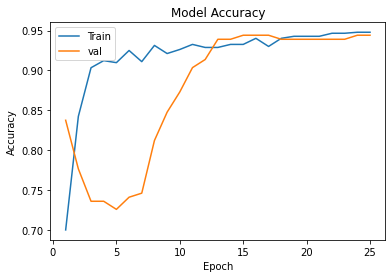

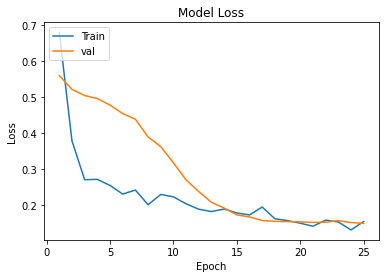

In [0]:
learning_curve(history,25)